In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [17]:
#Geração dos Dados
N = 100

x1 = np.random.randint(0,2,N)
x2 = np.random.randint(0,2,N)

#Dados com ruído
x1n = x1 + 0.1*np.random.randn(N,)
x2n = x2 + 0.1*np.random.randn(N,)

y_and = x1 & x2
y_or = x1 | x2

dataset_and = np.c_[x1n, x2n, y_and]
dataset_or = np.c_[x1n, x2n, y_or]

In [31]:
def perceptron(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]
    
    # set weights to zero
    w = np.zeros((1,3))
    
    misclassified_ = [] 
  
    for epoch in range(num_iter):
        misclassified = 0
        
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
                    
            target = 1.0 if (y > 0) else 0.0
            
            delta = label.item(0) - target
            
            if(delta): # misclassified
                misclassified += 1
                w = w + (delta * x)
        
        misclassified_.append(misclassified)
    return (w, misclassified_)

# And

In [32]:
num_iter = 40
w, misclassified_ = perceptron(dataset_and, num_iter)

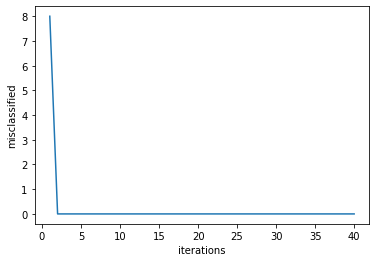

In [25]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

# Or

In [26]:
num_iter = 40
w2, misclassified_2 = perceptron(dataset_or, num_iter)

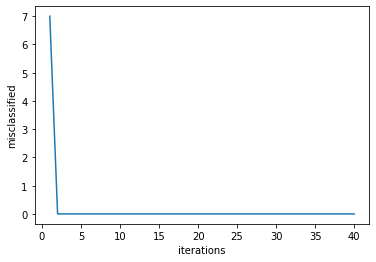

In [27]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_2)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()